In [53]:
import numpy as np
import cv2
import os
import os.path as osp
from glob import glob
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [54]:
path = "/home/ramesh/Desktop/test"
file = "unt_00046"

In [55]:
test_img = cv2.imread(osp.join(path, file + ".png"))
test_img.shape

(68, 398, 3)

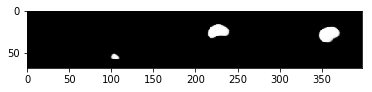

In [56]:
plt.imshow(test_img)

In [61]:
test_img[200:220,10:50]

array([], shape=(0, 40, 3), dtype=uint8)

In [6]:
type(test_img)

numpy.ndarray

In [7]:
file1 = "mask_00046"

In [8]:
test_img1 = cv2.imread(osp.join(path, file1 + ".png"))
test_img1.shape

(68, 398, 3)

In [10]:
file2 = "data_00046"

In [11]:
test_img2 = cv2.imread(osp.join(path, file2 + ".png"))
test_img2.shape

(68, 398, 3)

In [35]:
tes = test_img2.reshape(1,-1)
tes.shape

(1, 81192)

In [46]:
t1 = test_img.flatten(-1)
t.shape

/home/ramesh/anaconda3/envs/nn_net/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  """Entry point for launching an IPython kernel.


(81192,)

In [47]:
t2 = test_img2.flatten()
t2.shape

(81192,)

In [48]:
y1 = test_img.reshape(1,-1)
y1.shape

(1, 81192)

In [49]:
y2 = test_img1.reshape(1,-1)
y2.shape

(1, 81192)

In [40]:
ytrue =  []

In [41]:
ytrue.append(y1)

In [42]:
len(ytrue)

1

In [43]:
ytrue.append(y2)
len(ytrue)

2

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y1, y2)

ValueError: multiclass-multioutput is not supported

In [52]:
y1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
file1 = "2nu"

In [6]:
test_img = cv2.imread(osp.join(path, file1 + ".png"))
test_img.shape

(256, 320, 3)

In [41]:
file3 = "im_liver_0_0045"

In [43]:
test_img = cv2.imread(osp.join(path, file3 + ".png"))
test_img.shape

(512, 512, 3)

In [44]:
type(test_img)

numpy.ndarray

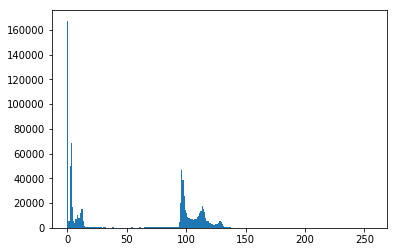

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

test_img = cv2.imread(osp.join(path, file3 + ".png"))
plt.hist(test_img.ravel(),256,[0,256]); plt.show()

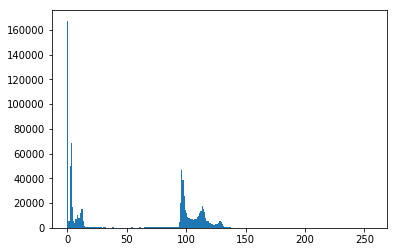

In [48]:
test_img = cv2.imread(osp.join(path, file3 + ".png"))
plt.hist(test_img.ravel(),256,[0,256]); plt.show()

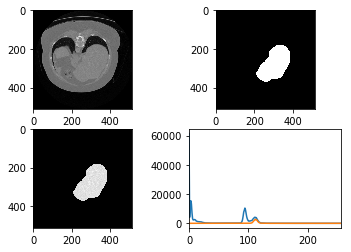

In [51]:
imgname ="liver_5_0437"
mask ="mask_liver_5_0437"
dataimg = cv2.imread(osp.join(path, imgname + ".png"),0)

maskimg = cv2.imread(osp.join(path, mask + ".png"),0)

# create a mask
#mask = np.zeros(img.shape[:2], np.uint8)
#mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(dataimg,dataimg,mask = maskimg)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([dataimg],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([dataimg],[0],maskimg,[256],[0,256])

plt.subplot(221), plt.imshow(dataimg, 'gray')
plt.subplot(222), plt.imshow(maskimg,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

In [9]:
type(test_img)

numpy.ndarray

In [10]:
file4 = "mask_liver_0_0045"

In [11]:
test_img = cv2.imread(osp.join(path, file4 + ".png"))
test_img.shape

(512, 512, 3)

In [12]:
def subfiles(folder, join=True, prefix=None, suffix=None, sort=True):
    if join:
        l = os.path.join
    else:
        l = lambda x, y: y
    res = [l(folder, i) for i in os.listdir(folder) if os.path.isfile(os.path.join(folder, i))
            and (prefix is None or i.startswith(prefix))
            and (suffix is None or i.endswith(suffix))]
    if sort:
        res.sort()
    return res

In [33]:
from collections import defaultdict

def preprocess_data(root_dir):
    image_dir = os.path.join(root_dir, 'imagesTr')
    label_dir = os.path.join(root_dir, 'masksTr')
    output_dir = os.path.join(root_dir, 'preprocessed_zip')
    classes = 2

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print('Created' + output_dir + '...')

    class_stats = defaultdict(int)
    total = 0
    
    #png_files = subfiles(image_dir, suffix=".png", join=False)

    #for i in range(0, len(png_files)):
    #    if nii_files[i].startswith("._"):
    #        nii_files[i] = nii_files[i][2:]
    
    patientNames = os.listdir(image_dir)
    for name in patientNames:
        pngImages = os.listdir(os.path.join(image_dir,name))
        for file in pngImages:
            image = cv2.imread(os.path.join(image_dir,name,file))
            label = cv2.imread(os.path.join(label_dir,name,file)) 
            print(file)
            print("label :",os.path.join(label_dir,name,file),"Shape :",label.shape)
            print("Image :",os.path.join(image_dir,name,file), "Shape :",image.shape)
            # normalize images
            image = (image - image.min())/(image.max()-image.min())
            print(" image shape :",image.shape)
            print(" label shape :",label.shape)
            result = np.stack((image, label))
            #np.save(os.path.join(output_dir, file.split('.')[0]+'.npy'), result)
            print(file)

In [34]:
dataRoot = "E:\IIITB\Documents\data\Dataset"
preprocess_data(dataRoot)

liver_0_0045.png
label : E:\IIITB\Documents\data\Dataset\masksTr\00\liver_0_0045.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\00\liver_0_0045.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_0_0045.png
liver_0_0046.png
label : E:\IIITB\Documents\data\Dataset\masksTr\00\liver_0_0046.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\00\liver_0_0046.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_0_0046.png
liver_0_0047.png
label : E:\IIITB\Documents\data\Dataset\masksTr\00\liver_0_0047.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\00\liver_0_0047.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_0_0047.png
liver_0_0048.png
label : E:\IIITB\Documents\data\Dataset\masksTr\00\liver_0_0048.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\00\liver_0_0048.png Shape

liver_1_0075.png
label : E:\IIITB\Documents\data\Dataset\masksTr\01\liver_1_0075.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\01\liver_1_0075.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_1_0075.png
liver_1_0076.png
label : E:\IIITB\Documents\data\Dataset\masksTr\01\liver_1_0076.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\01\liver_1_0076.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_1_0076.png
liver_1_0077.png
label : E:\IIITB\Documents\data\Dataset\masksTr\01\liver_1_0077.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\01\liver_1_0077.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_1_0077.png
liver_1_0078.png
label : E:\IIITB\Documents\data\Dataset\masksTr\01\liver_1_0078.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\01\liver_1_0078.png Shape

liver_2_0385.png
label : E:\IIITB\Documents\data\Dataset\masksTr\02\liver_2_0385.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\02\liver_2_0385.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_2_0385.png
liver_2_0386.png
label : E:\IIITB\Documents\data\Dataset\masksTr\02\liver_2_0386.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\02\liver_2_0386.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_2_0386.png
liver_2_0387.png
label : E:\IIITB\Documents\data\Dataset\masksTr\02\liver_2_0387.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\02\liver_2_0387.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_2_0387.png
liver_2_0388.png
label : E:\IIITB\Documents\data\Dataset\masksTr\02\liver_2_0388.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\02\liver_2_0388.png Shape

liver_2_0445.png
label : E:\IIITB\Documents\data\Dataset\masksTr\02\liver_2_0445.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\02\liver_2_0445.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_2_0445.png
liver_2_0446.png
label : E:\IIITB\Documents\data\Dataset\masksTr\02\liver_2_0446.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\02\liver_2_0446.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_2_0446.png
liver_2_0447.png
label : E:\IIITB\Documents\data\Dataset\masksTr\02\liver_2_0447.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\02\liver_2_0447.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_2_0447.png
liver_2_0448.png
label : E:\IIITB\Documents\data\Dataset\masksTr\02\liver_2_0448.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\02\liver_2_0448.png Shape

liver_3_0333.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0333.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0333.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_3_0333.png
liver_3_0334.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0334.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0334.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_3_0334.png
liver_3_0335.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0335.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0335.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_3_0335.png
liver_3_0336.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0336.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0336.png Shape

liver_3_0393.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0393.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0393.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_3_0393.png
liver_3_0394.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0394.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0394.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_3_0394.png
liver_3_0395.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0395.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0395.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_3_0395.png
liver_3_0396.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0396.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0396.png Shape

liver_3_0453.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0453.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0453.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_3_0453.png
liver_3_0454.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0454.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0454.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_3_0454.png
liver_3_0455.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0455.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0455.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_3_0455.png
liver_3_0456.png
label : E:\IIITB\Documents\data\Dataset\masksTr\03\liver_3_0456.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\03\liver_3_0456.png Shape

liver_4_0393.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0393.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0393.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0393.png
liver_4_0394.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0394.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0394.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0394.png
liver_4_0395.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0395.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0395.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0395.png
liver_4_0396.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0396.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0396.png Shape

liver_4_0453.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0453.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0453.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0453.png
liver_4_0454.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0454.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0454.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0454.png
liver_4_0455.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0455.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0455.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0455.png
liver_4_0456.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0456.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0456.png Shape

liver_4_0513.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0513.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0513.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0513.png
liver_4_0514.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0514.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0514.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0514.png
liver_4_0515.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0515.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0515.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0515.png
liver_4_0516.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0516.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0516.png Shape

liver_4_0573.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0573.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0573.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0573.png
liver_4_0574.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0574.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0574.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0574.png
liver_4_0575.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0575.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0575.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_4_0575.png
liver_4_0576.png
label : E:\IIITB\Documents\data\Dataset\masksTr\04\liver_4_0576.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\04\liver_4_0576.png Shape

liver_5_0343.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0343.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0343.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_5_0343.png
liver_5_0344.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0344.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0344.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_5_0344.png
liver_5_0345.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0345.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0345.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_5_0345.png
liver_5_0346.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0346.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0346.png Shape

liver_5_0403.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0403.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0403.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_5_0403.png
liver_5_0404.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0404.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0404.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_5_0404.png
liver_5_0405.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0405.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0405.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_5_0405.png
liver_5_0406.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0406.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0406.png Shape

liver_5_0463.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0463.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0463.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_5_0463.png
liver_5_0464.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0464.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0464.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_5_0464.png
liver_5_0465.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0465.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0465.png Shape : (512, 512, 3)
 image shape : (512, 512, 3)
 label shape : (512, 512, 3)
liver_5_0465.png
liver_5_0466.png
label : E:\IIITB\Documents\data\Dataset\masksTr\05\liver_5_0466.png Shape : (512, 512, 3)
Image : E:\IIITB\Documents\data\Dataset\imagesTr\05\liver_5_0466.png Shape

In [35]:
def subfiles(folder, join=True, prefix=None, suffix=None, sort=True):
    if join:
        l = os.path.join
    else:
        l = lambda x, y: y
    res = [l(folder, i) for i in os.listdir(folder) if os.path.isfile(os.path.join(folder, i))
            and (prefix is None or i.startswith(prefix))
            and (suffix is None or i.endswith(suffix))]
    if sort:
        res.sort()
    return res

In [37]:
import pickle
#from utilities.file_and_folder_operations import subfiles

import os
import numpy as np


def create_splits(output_dir, image_dir):
    npy_files = subfiles(image_dir, suffix=".npy", join=False)

    trainset_size = len(npy_files)*50//100
    valset_size = len(npy_files)*25//100
    testset_size = len(npy_files)*25//100

    splits = []
    for split in range(0, 5):
        image_list = npy_files.copy()
        trainset = []
        valset = []
        testset = []
        for i in range(0, trainset_size):
            patient = np.random.choice(image_list)
            image_list.remove(patient)
            trainset.append(patient[:-4])
        for i in range(0, valset_size):
            patient = np.random.choice(image_list)
            image_list.remove(patient)
            valset.append(patient[:-4])
        for i in range(0, testset_size):
            patient = np.random.choice(image_list)
            image_list.remove(patient)
            testset.append(patient[:-4])
        split_dict = dict()
        split_dict['train'] = trainset
        split_dict['val'] = valset
        split_dict['test'] = testset

        splits.append(split_dict)

    with open(os.path.join(output_dir, 'splits.pkl'), 'wb') as f:
        pickle.dump(splits, f)


In [38]:
data_dir = "E:\IIITB\Documents\data\Dataset\preprocessed"
create_splits(data_dir, data_dir)

In [ ]:
scale = Rescale(256)
crop = RandomCrop(128)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

In [ ]:
test_img = cv2.imread(osp.join(self.root_dir, "test", dataDir,image))
